In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [232]:
df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\2734720167.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

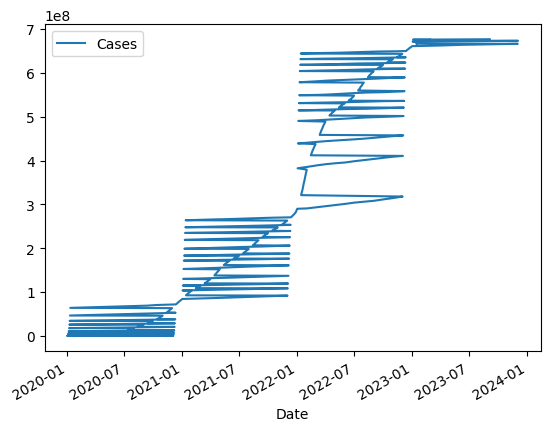

In [233]:
df.plot()

In [234]:
dfr=df.resample('D').ffill()

In [235]:
dfr.head()

,Cases
Date,
2020-01-02,12038
2020-01-03,88402
2020-01-04,955728
2020-01-05,3371033
2020-01-06,6283580


In [236]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

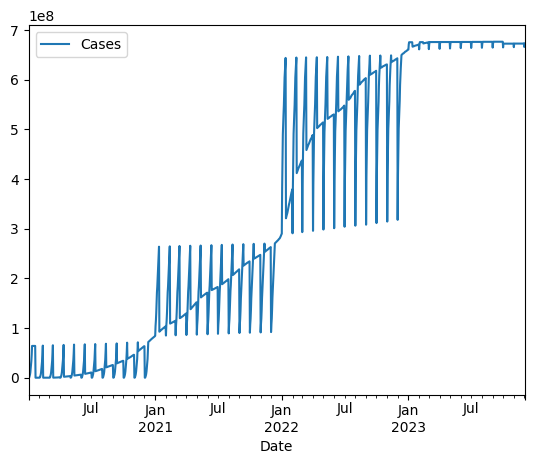

In [237]:
dfr.plot()

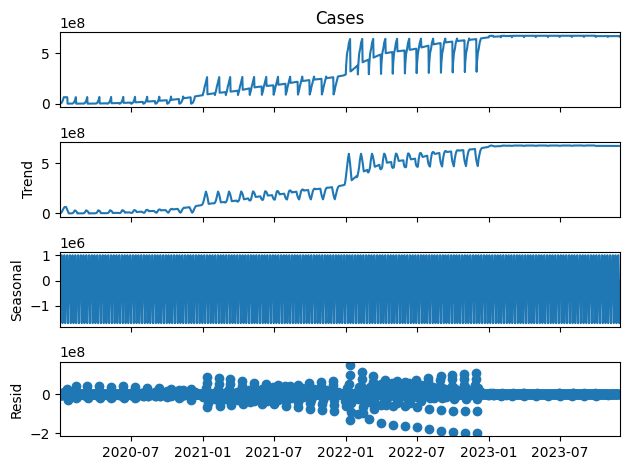

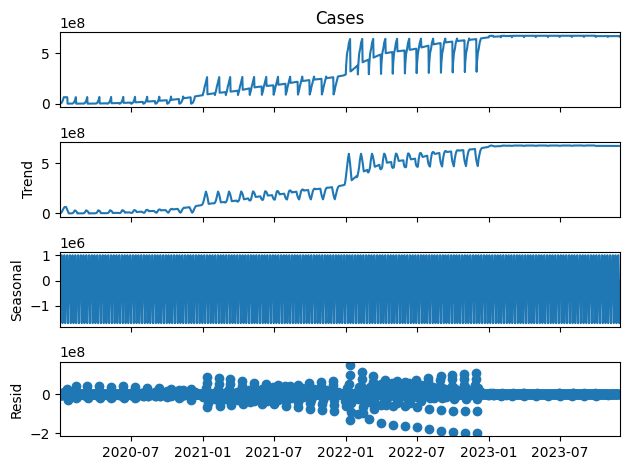

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [239]:
len(dfr)

1431

In [240]:
80*1431

114480

In [241]:
0.8*1431

1144.8

In [242]:
# train = dfr.iloc[:1144]
# test = dfr.iloc[1144:]
     

In [243]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [244]:
dfr.head(),dfr.tail()

(              Cases
 Date               
 2020-01-02    12038
 2020-01-03    88402
 2020-01-04   955728
 2020-01-05  3371033
 2020-01-06  6283580,
                 Cases
 Date                 
 2023-11-28  672828531
 2023-11-29  672828531
 2023-11-30  672828531
 2023-12-01  666097539
 2023-12-02  672906177)

In [245]:
# scaler.fit(train)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [246]:
def scaleandpreparedata(dfr):
    n=len(dfr)
    p=int(n*0.8)
    train=dfr.iloc[:p]
    test=dfr.iloc[p:]

    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return (scaled_train,scaled_test,test,scaler)

In [247]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [248]:
# n_input = 12
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)
     

In [249]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [250]:
# define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [251]:
# model.summary()

In [252]:
def createModelandTrainModel(scaled_train,n_input,n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')


    # n_input = 12
    # n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)
    model.fit(generator,epochs=50)
    return model


In [253]:
# model.fit(generator,epochs=50)

In [254]:
# last_train_batch = scaled_train[-12:]

In [255]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [256]:
# model.predict(last_train_batch)

In [257]:
# scaled_test[0]

In [258]:
def functionforprediction(dfr,n_input):
    n_features=1
    test_predictions = []
    (scaled_train,scaled_test,testp,scaler)=scaleandpreparedata(dfr)
    model=createModelandTrainModel(scaled_train,n_input,n_features)
    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     
    true_predictions = scaler.inverse_transform(test_predictions)
    return (true_predictions,testp)

In [259]:
(true_predictions,test)=functionforprediction(dfr,12)

Epoch 1/50


C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1748

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1904
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0063
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0048
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062
Epoch 16/50
36/36 ━━━━━

In [260]:
test.head()

,Cases
Date,
2023-02-19,674056229
2023-02-20,674143589
2023-02-21,674323721
2023-02-22,674569824
2023-02-23,674790916


In [261]:
# test_predictions,scaled_test

In [262]:
# true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions.astype(int)


C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\3919622673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [263]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,674056229,672999135
2023-02-20,674143589,672333199
2023-02-21,674323721,671651677
2023-02-22,674569824,671021910
2023-02-23,674790916,670452518


<Axes: xlabel='Date'>

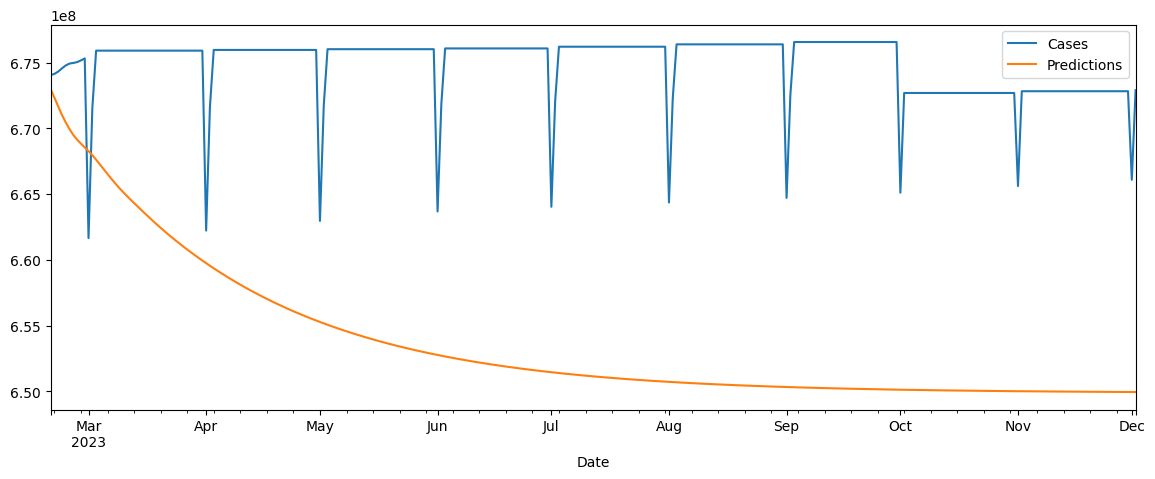

In [264]:
test.plot(figsize=(14,5))

In [265]:
testm=test.resample('M').sum()

C:\Users\sneha\AppData\Local\Temp\ipykernel_27792\1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

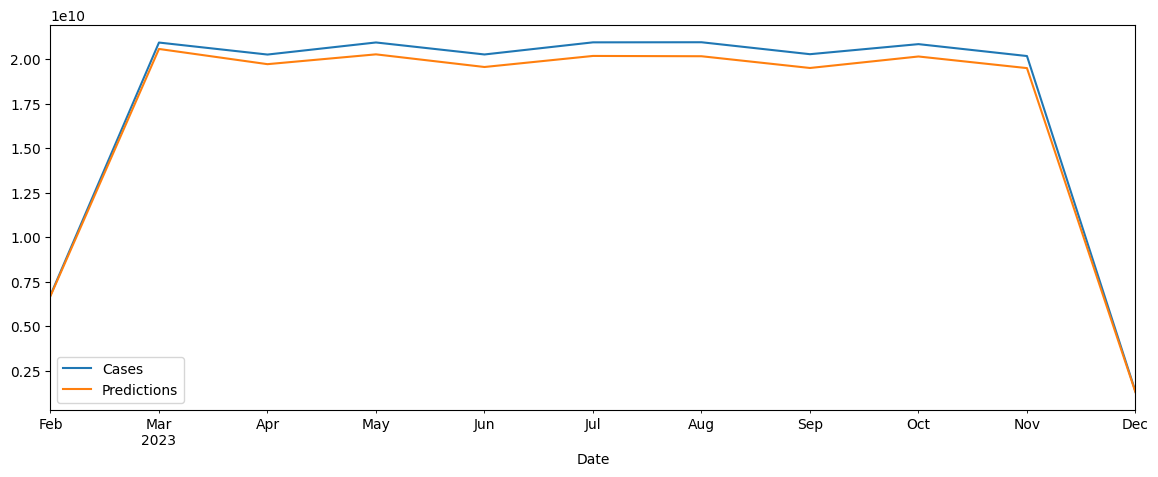

In [266]:
testm.plot(figsize=(14,5))